In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

In [4]:
height = [175, 160, 185, 183, 172, 178, 167, 163, 180]
weight = [64, 58, 75, 67, 68, 67, 65, 60, 70]
data = pd.DataFrame({'weight':weight,'height':height})
data

,weight,height
0,64,175
1,58,160
2,75,185
3,67,183
4,68,172
5,67,178
6,65,167
7,60,163
8,70,180


Text(0, 0.5, 'weight (kg)')

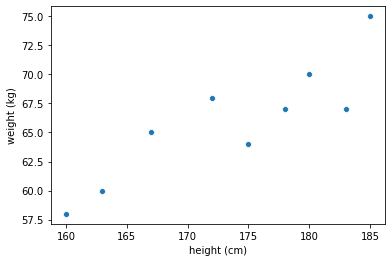

In [6]:
sns.scatterplot('height', 'weight', data=data)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')

## Equation of a line

y = m*x + b

where m is the slope, b is the y-intercept

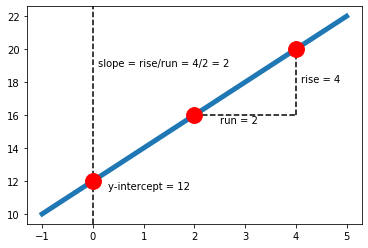

In [13]:
plt.plot([-1,5], [10,22], linewidth = 5, zorder=1)
plt.axvline(x=0, color = 'black', linestyle = '--', zorder=2)
plt.scatter([0],[12], color = 'red', s=250, zorder=3)
plt.text(.3, 11.5, 'y-intercept = 12', fontsize=10)
plt.plot([2,4], [16,16], color = 'black', linestyle = '--', zorder=4)
plt.plot([4,4], [16,20], color = 'black', linestyle = '--', zorder=5)
plt.scatter([2,4],[16,20], color = 'red', s=250, zorder=6)
plt.text(2.5, 15.5, 'run = 2', fontsize=10)
plt.text(4.1, 18, 'rise = 4', fontsize=10)
plt.text(.1, 19, 'slope = rise/run = 4/2 = 2', fontsize=10)
plt.show()

[A fun applet](https://content.codecademy.com/programs/data-science-path/line-fitter/line-fitter.html)

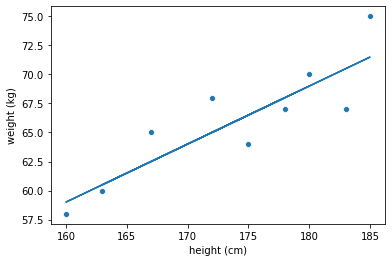

In [12]:
sns.scatterplot('height', 'weight', data=data)
predicted_weight = 0.5 * data.height - 21
plt.plot(data.height, predicted_weight)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

In [11]:
model = sm.OLS.from_formula('weight ~ height', data = data).fit()
print(model.params)

Intercept   -21.668269
height        0.504808
dtype: float64


### Equation:

weight = 0.504808 * height + -21.668269

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     22.72
Date:                Wed, 12 May 2021   Prob (F-statistic):            0.00204
Time:                        09:54:45   Log-Likelihood:                -20.395
No. Observations:                   9   AIC:                             44.79
Df Residuals:                       7   BIC:                             45.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.6683     18.412     -1.177      0.2

/Users/sophiesommer/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


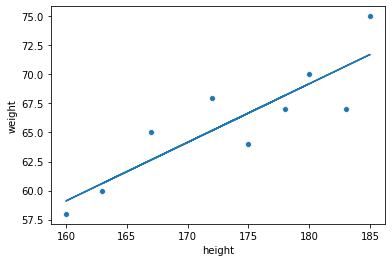

In [14]:
sns.scatterplot('height', 'weight', data=data)
predicted_weight = model.params[1] * data.height + model.params[0]
plt.plot(data.height, predicted_weight)
plt.show()

In [17]:
# making predictions using the formula
print(0.504808 * 160 - 21.668269) 
 
print(model.params[1]*160 + model.params[0])

59.101011000000014
59.100961538461576


In [18]:
# can also use .predict() method
newdata = {"height":[160]}
print(model.predict(newdata))

0    59.100962
dtype: float64


## Assumptions

- independence
- linear functional form
- homoscedasticity
- normality

In [20]:
fitted_values = model.predict(data)
print(fitted_values)

0    66.673077
1    59.100962
2    71.721154
3    70.711538
4    65.158654
5    68.187500
6    62.634615
7    60.615385
8    69.197115
dtype: float64


In [21]:
# Note: this is essentially the same as:

print(0.504808 * data.height - 21.668269)

0    66.673131
1    59.101011
2    71.721211
3    70.711595
4    65.158707
5    68.187555
6    62.634667
7    60.615435
8    69.197171
Name: height, dtype: float64


In [24]:
residuals = data.weight - fitted_values

In [25]:
print(residuals)

0   -2.673077
1   -1.100962
2    3.278846
3   -3.711538
4    2.841346
5   -1.187500
6    2.365385
7   -0.615385
8    0.802885
dtype: float64


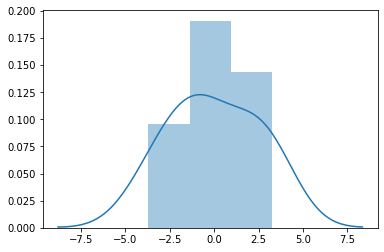

In [28]:
sns.distplot(residuals)

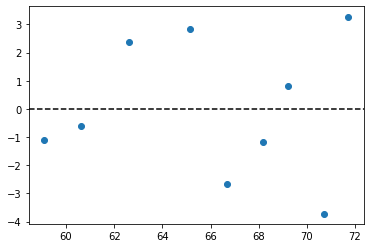

In [30]:
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'black', linestyle = '--')
plt.show()

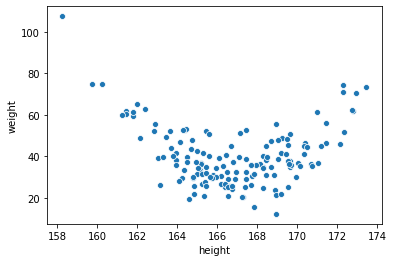

In [44]:
# let's imagine another, very weird/not real situation
np.random.seed(3)
height2 = np.random.normal(167,3, 150) 
weight2 = (height2-167)**2 + np.random.normal(0,8,150)+30
data2 = pd.DataFrame({'weight':weight2,'height':height2})
sns.scatterplot('height', 'weight', data=data2)
plt.show()

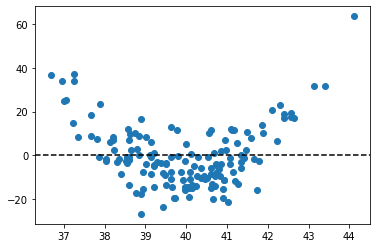

In [45]:
# and here's what that plot would look like
model = sm.OLS.from_formula('weight ~ height', data=data2)
results= model.fit()
fitted_values = results.predict(data2)
residuals = data2.weight - fitted_values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'black', linestyle = '--')
plt.show()

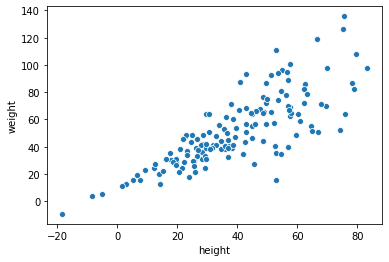

In [46]:
# another scenario - breaks homoscedasticity

np.random.seed(3)
height3 = np.random.normal(40,20, 150) 
weight3 = 10 + height3 + np.random.normal(0,1,150)*height3/3
data3 = pd.DataFrame({'weight':weight3,'height':height3})
sns.scatterplot('height', 'weight', data=data3)
plt.show()

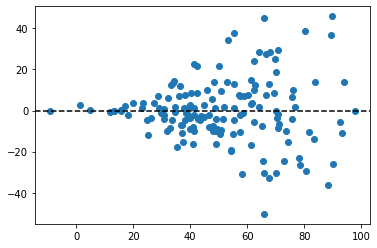

In [47]:
# and here's what that plot would look like
model = sm.OLS.from_formula('weight ~ height', data=data3)
results= model.fit()
fitted_values = results.predict(data3)
residuals = data3.weight - fitted_values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color = 'black', linestyle = '--')
plt.show()